In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
pdr.get_data_alphavantage('TSLA', api_key='YOUR_API_KEY')

,open,high,low,close,volume
2010-06-29,19.000,25.0000,17.54,23.89,18766300
2010-06-30,25.790,30.4192,23.30,23.83,17187100
2010-07-01,25.000,25.9200,20.27,21.96,8218800
2010-07-02,23.000,23.1000,18.71,19.20,5139800
2010-07-06,20.000,20.0000,15.83,16.11,6866900
...,...,...,...,...,...
2025-03-11,225.305,237.0649,217.02,230.58,174896415
2025-03-12,247.220,251.8400,241.10,248.09,142215681
2025-03-13,248.125,248.2900,232.60,240.68,114813525
2025-03-14,247.310,251.5800,240.73,249.98,100242264


In [4]:
import yfinance as yf

# Download TSLA data
df_tesla = yf.download('TSLA', start='2020-01-01', end='2025-03-11')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
print(type(df_tesla))


<class 'pandas.core.frame.DataFrame'>


In [6]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


<Axes: xlabel='Date'>

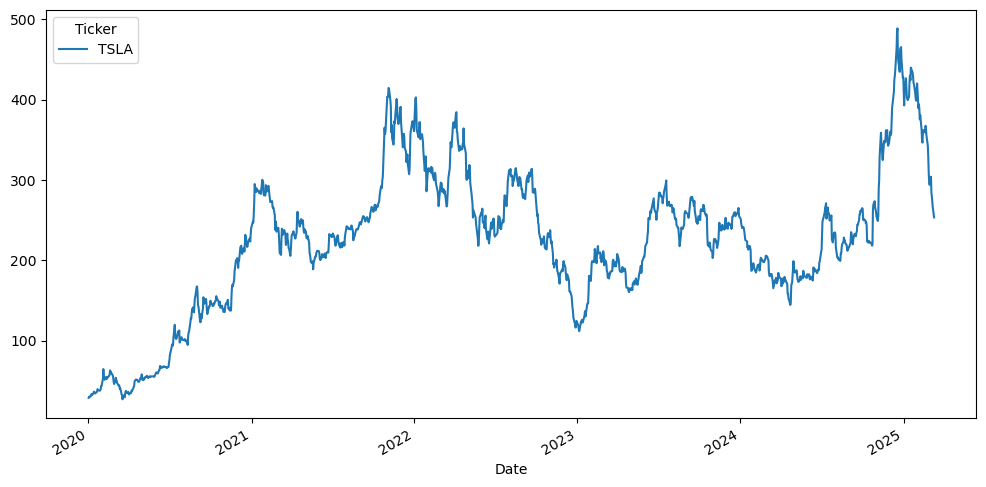

In [7]:
df_tesla['High'].plot(figsize=(12,6))

<Axes: xlabel='Date'>

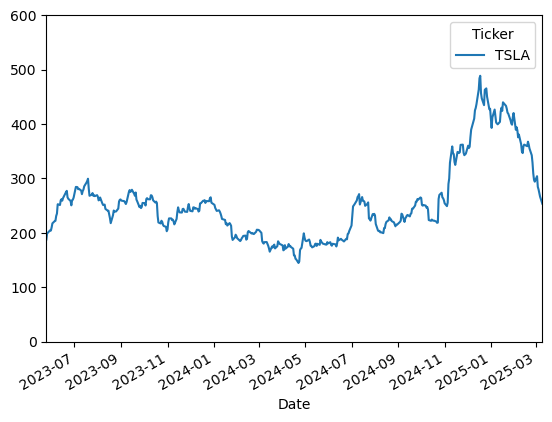

In [8]:
df_tesla['High'].plot(xlim=['2023-05-25','2025-03-10'], ylim= [0,600])

In [9]:
df_tesla.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28',
               '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06',
               '2025-03-07', '2025-03-10'],
              dtype='datetime64[ns]', name='Date', length=1303, freq=None)

In [10]:
index= df_tesla.loc['2023-04-16':'2025-03-10'].index

In [11]:
share_open =df_tesla.loc['2023-04-16':'2025-03-10']['Open']

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

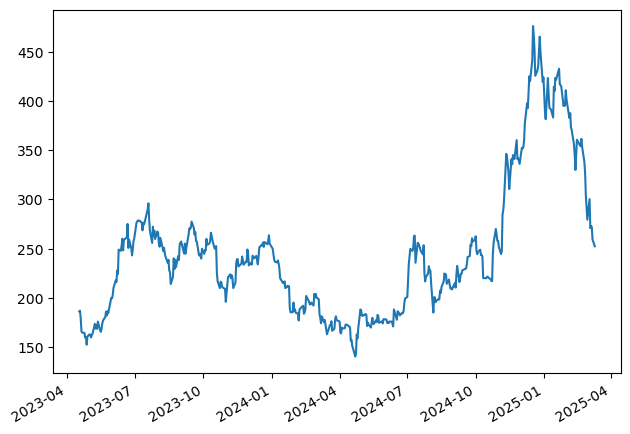

In [13]:
figure, axis= plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() #prevents overlapping
axis.plot(index, share_open)

In [14]:
##date time index

In [15]:
df_tesla = df_tesla.reset_index()

In [16]:
df_tesla.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        1303 non-null   datetime64[ns]
 1   (Close, TSLA)   1303 non-null   float64       
 2   (High, TSLA)    1303 non-null   float64       
 3   (Low, TSLA)     1303 non-null   float64       
 4   (Open, TSLA)    1303 non-null   float64       
 5   (Volume, TSLA)  1303 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 61.2 KB


In [17]:
df_tesla.set_index(['Date'], drop= True )

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...
2025-03-04,272.040009,284.350006,261.839996,270.929993,126706600
2025-03-05,279.100006,279.549988,267.709991,272.920013,94042900


In [18]:
datetime(2024,11,21)

datetime.datetime(2024, 11, 21, 0, 0)

In [19]:
datetime.now()

datetime.datetime(2025, 3, 18, 13, 36, 7, 748670)

In [20]:

df_tesla['Date'] = pd.to_datetime(df_tesla['Date'])

# Set 'Date' as the index
df_tesla.set_index('Date', inplace=True)

# Now resample with 'YE' (Year-End frequency) and apply min() function
df_tesla.resample(rule='YE').min()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-12-31,24.081333,26.990667,23.367332,24.980000,52073100
2021-12-31,187.666672,188.736664,179.830002,184.183334,29401800
2022-12-31,109.099998,116.269997,108.239998,110.349998,41864700
2023-12-31,108.099998,111.750000,101.809998,103.000000,65125200
2024-12-31,142.050003,144.440002,138.800003,140.559998,37167600
2025-12-31,222.149994,253.369995,220.000000,252.539993,45965400


<Axes: xlabel='Date'>

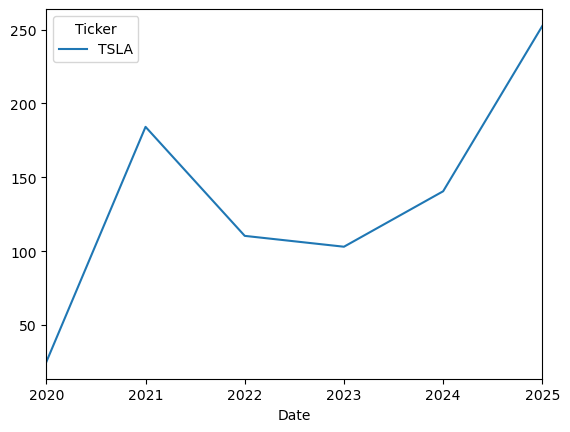

In [21]:
#rule ye is for year end 
# rule qs is for quaterly
df_tesla.resample(rule='YE').min()['Open'].plot()

<Axes: xlabel='Date'>

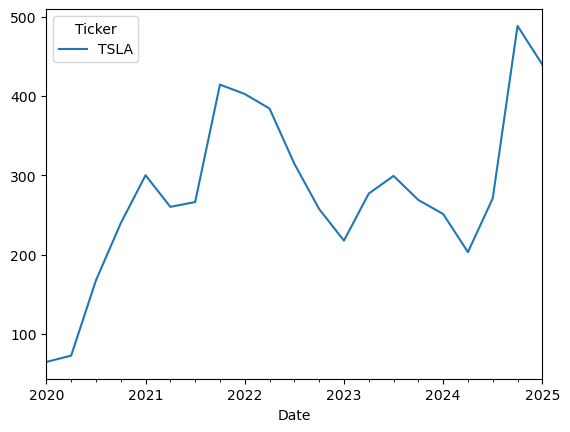

In [22]:
df_tesla.resample(rule='QS').max()['High'].plot()

/var/folders/g3/b5mpjpwd5sn18c6qpr7zgl440000gn/T/ipykernel_61031/2099757916.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar')


<Axes: xlabel='Date'>

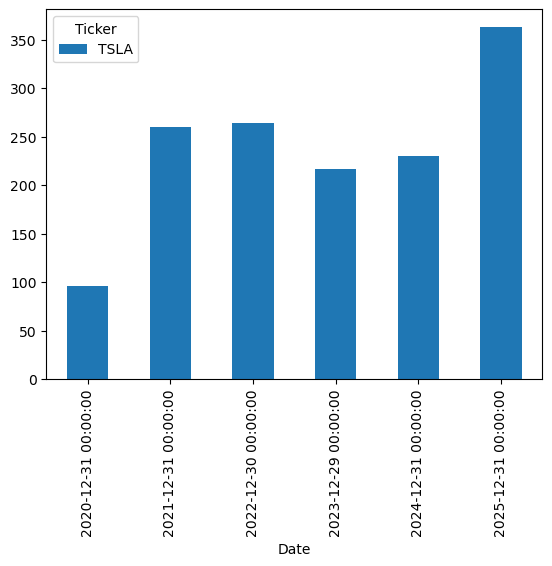

In [23]:
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar')

<Axes: xlabel='Date'>

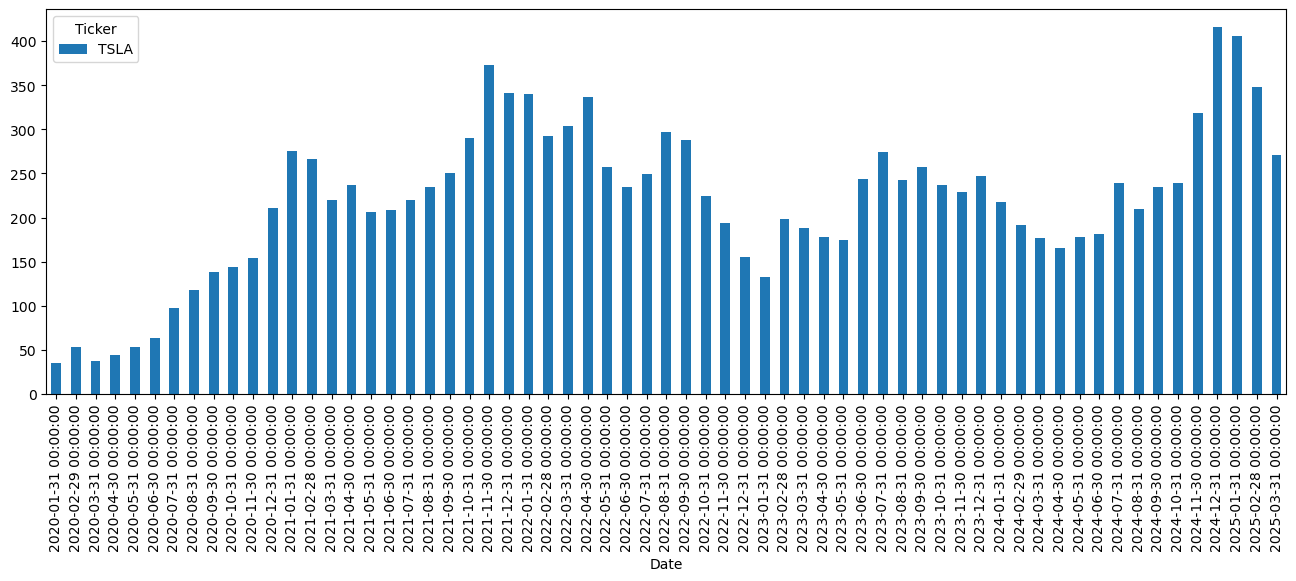

In [24]:
df_tesla['Open'].resample(rule='ME').mean().plot(figsize=(16,5), kind='bar')


In [25]:
df_tesla['High'].rolling(12).mean()

Ticker,TSLA
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2025-03-04,330.450836
2025-03-05,323.580002
2025-03-06,316.375834


In [26]:
df_tesla['Open:30 days rolling']= df_tesla['Open'].rolling(30).mean()

In [27]:
df_tesla.head()

Price,Close,High,Low,Open,Volume,Open:30 days rolling
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500,NaN
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500,NaN
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000,NaN
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500,NaN
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500,NaN


<Axes: xlabel='Date'>

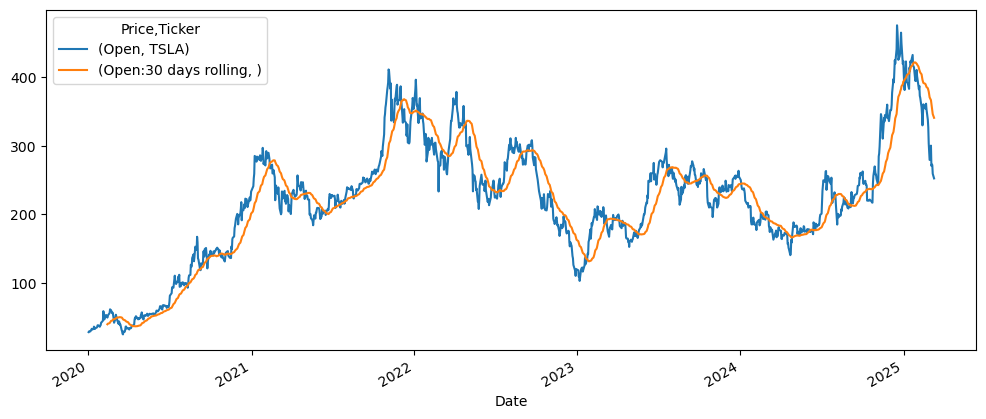

In [28]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))

In [29]:
pdr.get_data_alphavantage('MSFT', api_key='YOUR_API_KEY')

,open,high,low,close,volume
2005-03-23,23.990,24.3900,23.9600,24.18,79293300
2005-03-24,24.260,24.4700,24.1998,24.28,78820900
2005-03-28,24.400,24.4700,24.1800,24.20,49802000
2005-03-29,24.140,24.2400,23.8200,23.92,74231700
2005-03-30,24.030,24.1900,24.0000,24.16,59585700
...,...,...,...,...,...
2025-03-11,379.000,386.0000,376.9100,380.45,30380177
2025-03-12,382.950,385.2165,378.9507,383.27,24253567
2025-03-13,383.155,385.3200,377.4500,378.77,20473017
2025-03-14,379.775,390.2300,379.5100,388.56,19952846


In [30]:
df_micro = yf.download('MSFT', start='2020-01-01', end='2025-03-11')

[*********************100%***********************]  1 of 1 completed


In [31]:
df_micro.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,153.323273,153.428276,151.137310,151.566865,22622100
2020-01-03,151.414124,152.683705,150.879566,151.127764,21116200
2020-01-06,151.805496,151.872323,149.399972,149.944085,20813700
2020-01-07,150.421387,152.416438,150.173203,152.082346,21634100
2020-01-08,152.817307,153.495059,150.774525,151.710000,27746500


In [32]:
df_micro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2020-01-02 to 2025-03-10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   1303 non-null   float64
 1   (High, MSFT)    1303 non-null   float64
 2   (Low, MSFT)     1303 non-null   float64
 3   (Open, MSFT)    1303 non-null   float64
 4   (Volume, MSFT)  1303 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.1 KB


<Axes: xlabel='Date'>

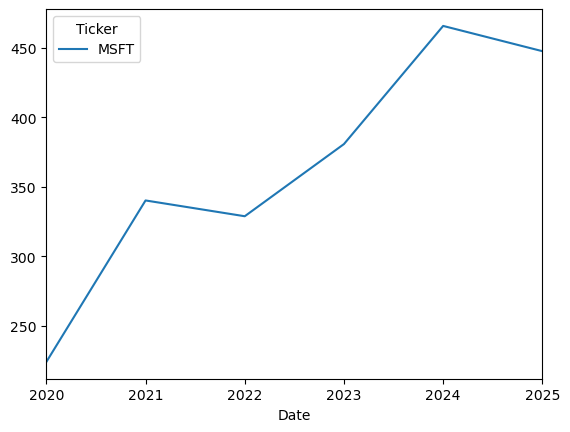

In [33]:
df_micro['High'].resample(rule='YE').max().plot()